# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline





# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#input dataset
customer_data = pd.read_csv ('Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
customer_data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [5]:
customer_data.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [6]:
print("Jumlah duplikasi:", customer_data.duplicated().sum())

Jumlah duplikasi: 0


In [7]:
customer_data.describe(include='all')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,1965,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [8]:
#menghapus data missing_value
customer_data_cleaned = customer_data.dropna(subset=['Profession'])

In [9]:
customer_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


In [10]:
#encode 'gender'
gender_encoder = LabelEncoder()
customer_data_cleaned['Gender'] = gender_encoder.fit_transform(customer_data_cleaned['Gender'])

C:\Users\dzikri\AppData\Local\Temp\ipykernel_15732\3135496467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data_cleaned['Gender'] = gender_encoder.fit_transform(customer_data_cleaned['Gender'])


In [11]:
#encode 'Profession'
profession_encoder = LabelEncoder()
customer_data_cleaned['Profession'] = profession_encoder.fit_transform(customer_data_cleaned['Profession'])

C:\Users\dzikri\AppData\Local\Temp\ipykernel_15732\2227759065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data_cleaned['Profession'] = profession_encoder.fit_transform(customer_data_cleaned['Profession'])


In [12]:
customer_data_cleaned.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


In [13]:

features = customer_data_cleaned.drop(columns=["CustomerID"])


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


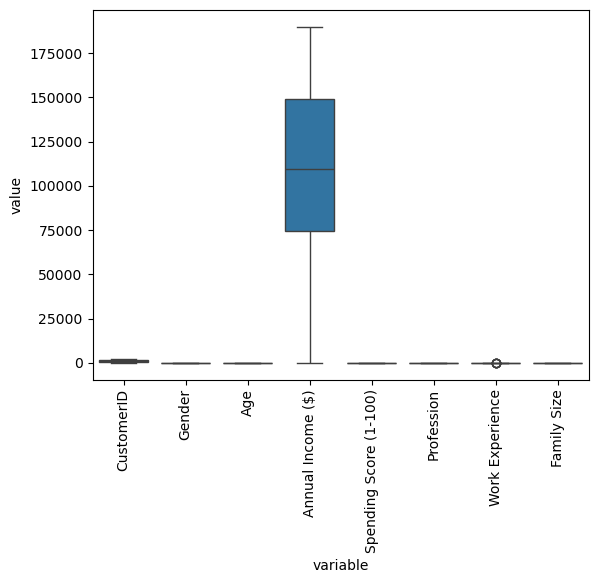

In [14]:
#mendeteksi outlier di dataset
customer_data_cleaned_melted = pd.melt(customer_data_cleaned, value_vars=customer_data_cleaned.select_dtypes(include=np.number).columns)

# Buat box plot
sns.boxplot(x='variable', y='value', data=customer_data_cleaned_melted)
plt.xticks(rotation=90) # Rotasi label sumbu x agar mudah dibaca
plt.show()

In [15]:
# Menghapus outlier berdasarkan IQR
Q1 = customer_data_cleaned['Work Experience'].quantile(0.25)
Q3 = customer_data_cleaned['Work Experience'].quantile(0.75)
IQR = Q3 - Q1

# Filter data tanpa outlier
filtered_data = customer_data_cleaned[
    ~((customer_data_cleaned['Work Experience'] < (Q1 - 1.5 * IQR)) | 
      (customer_data_cleaned['Work Experience'] > (Q3 + 1.5 * IQR)))
]


In [16]:
from sklearn.ensemble import IsolationForest


iso = IsolationForest(contamination=0.05)  
outliers = iso.fit_predict(features_scaled)


features_no_outliers = features_scaled[outliers == 1]


In [17]:


# Normalisasi
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(customer_data_cleaned.drop(columns=["CustomerID"]))


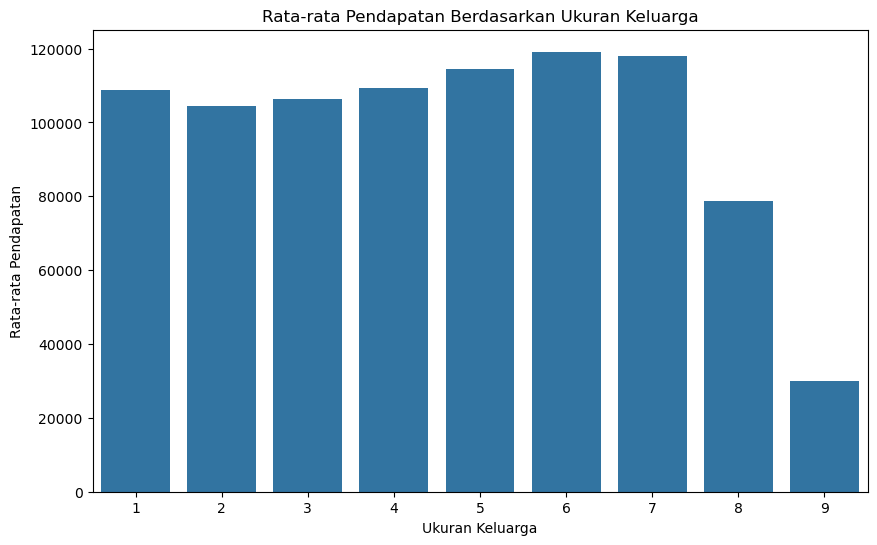

In [18]:
family_income=customer_data_cleaned.groupby('Family Size')['Annual Income ($)'].mean().reset_index()
plt.figure (figsize=(10,6))
sns.barplot(x='Family Size', y='Annual Income ($)', data=family_income)
plt.title('Rata-rata Pendapatan Berdasarkan Ukuran Keluarga')
plt.xlabel('Ukuran Keluarga')
plt.ylabel('Rata-rata Pendapatan')
plt.show()

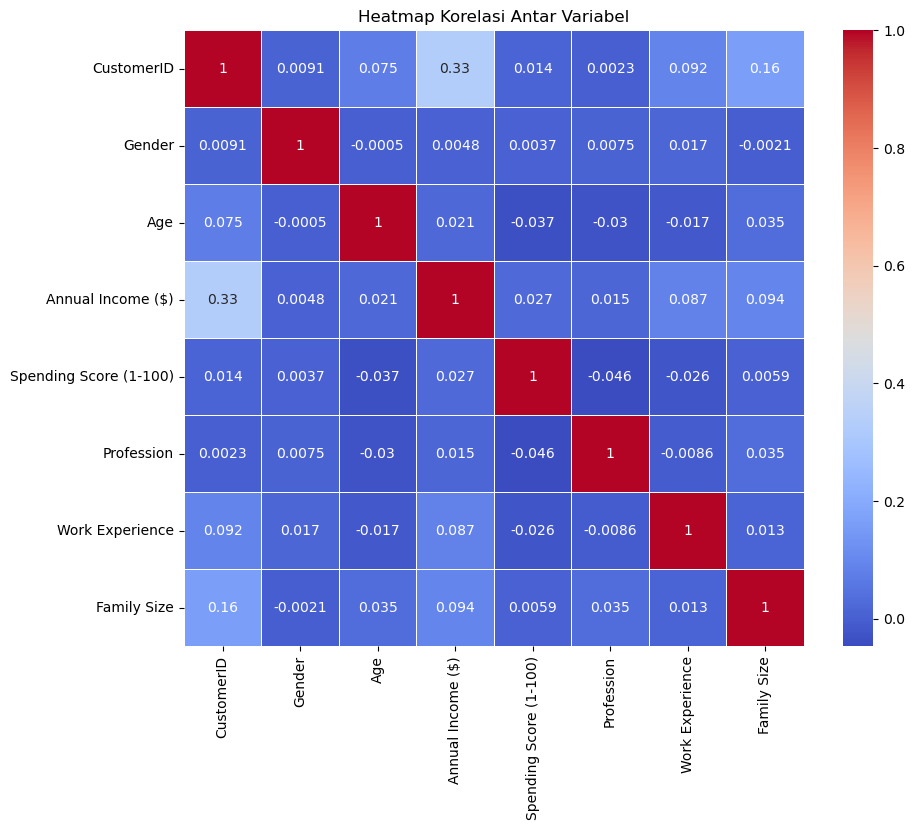

In [19]:
correlation_matrix = customer_data_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

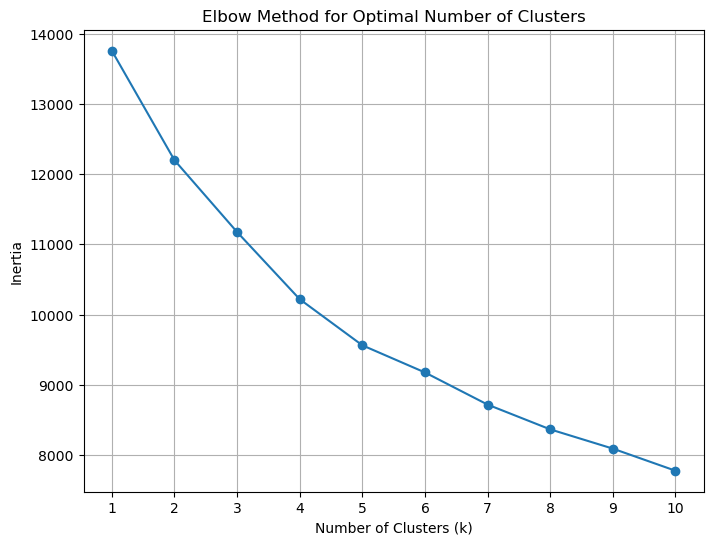

In [20]:

features = customer_data_cleaned.drop(columns=["CustomerID"])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


inertia = []
cluster_range = range(1, 11)  

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.grid()
plt.show()


In [24]:


def analyze_cluster(data, labels, num_clusters):
    print("Analisis Karakteristik Setiap Cluster:")
    for i in range(num_clusters):
        cluster_data = data[labels == i]
        print(f"\nCluster {i+1}:")
        print(cluster_data.describe())


kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(features_scaled)
cluster_labels_3 = kmeans_3.labels_


features_df = pd.DataFrame(features_scaled, columns=features.columns)


analyze_cluster(features_df, np.array(cluster_labels_3), 3)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
           Gender         Age  Annual Income ($)  Spending Score (1-100)  \
count  612.000000  612.000000         612.000000              612.000000   
mean     0.146869    0.299530           0.502646               -0.007318   
std      1.017824    0.988991           0.828104                0.991298   
min     -0.827798   -1.721179          -1.759322               -1.826199   
25%     -0.827798   -0.489117          -0.116418               -0.825128   
50%     -0.827798    0.443730           0.671672               -0.002820   
75%      1.208025    1.200569           1.200231                0.855240   
max      1.208025    1.763797           1.731235                1.749053   

       Profession  Work Experience  Family Size  
count  612.000000       612.000000   612.000000  
mean     0.272112        -0.659214     0.611603  
std      0.973524         0.461701     0.888797  
min     -1.112491        -1.042584    -1.401161  
25%     -0.719

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [25]:

features = customer_data_cleaned.drop(columns=["CustomerID"])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_5 = KMeans(n_clusters=5, random_state=42)


kmeans_3.fit(features_scaled)
kmeans_5.fit(features_scaled)


clusters_3 = kmeans_3.predict(features_scaled)
clusters_5= kmeans_5.predict(features_scaled)


silhouette_3 = silhouette_score(features_scaled, clusters_3)
silhouette_5 = silhouette_score(features_scaled, clusters_5)

print("Silhouette Score for 3 Clusters:", silhouette_3)
print("Silhouette Score for 5 Clusters:", silhouette_5)

Silhouette Score for 3 Clusters: 0.10459892767283283
Silhouette Score for 5 Clusters: 0.12469488028031357


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [26]:



feature_selector = SelectKBest(score_func=f_classif, k=4)  


selected_features_scaled = feature_selector.fit_transform(features_scaled, cluster_labels_3)


kmeans_selected_3 = KMeans(n_clusters=3, random_state=42)
kmeans_selected_5 = KMeans(n_clusters=5, random_state=42)


kmeans_selected_3.fit(selected_features_scaled)
kmeans_selected_5.fit(selected_features_scaled)


clusters_selected_3 = kmeans_selected_3.predict(selected_features_scaled)
clusters_selected_5 = kmeans_selected_5.predict(selected_features_scaled)


silhouette_selected_3 = silhouette_score(selected_features_scaled, clusters_selected_3)
silhouette_selected_5 = silhouette_score(selected_features_scaled, clusters_selected_5)


print("Silhouette Scores (Original Features):")
print("3 Clusters:", silhouette_3)
print("5 Clusters:", silhouette_5)

print("\nSilhouette Scores (Selected Features):")
print("3 Clusters:", silhouette_selected_3)
print("5 Clusters:", silhouette_selected_5)


Silhouette Scores (Original Features):
3 Clusters: 0.10459892767283283
5 Clusters: 0.12469488028031357

Silhouette Scores (Selected Features):
3 Clusters: 0.1899068532880376
5 Clusters: 0.20956098058619738


In [27]:
# Normalize/Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 1: Train Initial K-Means
kmeans_initial = KMeans(n_clusters=3, random_state=42)
cluster_labels_4 = kmeans_initial.fit_predict(features_scaled)

# Step 2: Define Parameter Grid for Grid Search
param_grid = {
    'n_clusters': [3, 4, 5],  # Number of clusters
    'k_features': [2, 3, 4, 5]  # Number of top features
}

# Initialize variables
best_score = -1
best_params = {}

# Step 3: Perform Grid Search
for params in ParameterGrid(param_grid):
    # Feature selection using SelectKBest with proxy labels
    selector = SelectKBest(score_func=f_classif, k=params['k_features'])
    selected_features = selector.fit_transform(features_scaled, cluster_labels_4)
    
    # Train KMeans with selected features
    kmeans = KMeans(n_clusters=params['n_clusters'], random_state=42)
    kmeans.fit(selected_features)
    
    # Evaluate using Silhouette Score
    score = silhouette_score(selected_features, kmeans.labels_)
    
    # Update best score and parameters
    if score > best_score:
        best_score = score
        best_params = params

# Display results
print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Parameters: {'k_features': 2, 'n_clusters': 4}
Best Silhouette Score: 0.4487616953700213


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Test with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(features_scaled)
silhouette_score_3_clusters = silhouette_score(features_scaled, labels_3)

# Test with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels_5 = kmeans_5.fit_predict(features_scaled)
silhouette_score_5_clusters = silhouette_score(features_scaled, labels_5)

# Display the results
print("Silhouette Score for 3 Clusters:", silhouette_score_3_clusters)
print("Silhouette Score for 5 Clusters:", silhouette_score_5_clusters)


Silhouette Score for 3 Clusters: 0.10459892767283283
Silhouette Score for 5 Clusters: 0.12469488028031357


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [83]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.